<a href="https://colab.research.google.com/github/deepMD-io/Diabetic-Retinopathy-Analyzer/blob/master/Copy_of_DR_MobileNet_Binary_Classifier_%2B_Tfjs_Web_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetic Retinopathy Analyzer**<br>
by Marsh [ @vbookshelf ]<br>
30 June 2019

<img src="http://dr.test.woza.work/assets/blind.jpg" width="400"></img>

## Introduction

Diabetic Retinopathy (DR) is the fastest growing cause of preventable blindness. All people with diabetes are at risk. They need to be screened once a year. 

This screening involves taking a picture of the back of the eye. The picture is called a fundus photo. It's taken using a special camera. An eye doctor then diagnoses this image. In many parts of the world there's a shortage of eye doctors. As a result, in India about 45% of people suffer some form of vision loss before the disease is detected.

It's now possible to take fundus photos using a cellphone camera.
https://www.jove.com/video/55958/smartphone-fundus-photography

Why not also use that same phone to automatically diagnose the photo?

The objective of this notebook is to build a binary classifier that can detect diabetic retinopathy on a fundus image. This model has been deployed online as a tensorflow.js web app. It can be easily accessed from anywhere where there's an internet connection.

Fundus images can be quite large, as can be seen by the size of the images in this competition. The good thing about tensorflow.js is that there's no need to upload images. The model runs in the browser and all processing is done locally on the user's computer or mobile phone. 

We will use a pre-trained MobileNet model. MobileNet was developed by Google to be small and fast. This makes it ideal for web use. Its performance metrics are close to larger models like Inception and VGG.

> Live Prototype Web App<br>
> http://dr.test.woza.work/
> 
> Github<br>
https://github.com/vbookshelf/Diabetic-Retinopathy-Analyzer

For best results please use the Chrome browser when accessing the app. In other browsers the app may freeze. The javascript, html and css code is available on github. 

Let's get started...

In [1]:
!rm -rf Diabetic-Retinopathy-Analyzer
!git clone https://github.com/deepMD-io/Diabetic-Retinopathy-Analyzer.git

Cloning into 'Diabetic-Retinopathy-Analyzer'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 42 (delta 10), reused 20 (delta 3), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [2]:
%cd Diabetic-Retinopathy-Analyzer
!pwd
!ls

/content/Diabetic-Retinopathy-Analyzer
/content/Diabetic-Retinopathy-Analyzer
 assets							  jscript
 css							  model_dr_1
'DR - MobileNet Binary Classifier + Tfjs Web App.ipynb'   model_dr_2
 index.html						  README.md


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!ls /content/drive/My\ Drive/DR/data


aptos2019-blindness-detection.zip


In [8]:
import os
os.environ['KAGGLE_USERNAME'] = "jingleim" # username from the json file
os.environ['KAGGLE_KEY'] = "9f800061b7bcd8113da47e293fcdf082" # key from the json file
!rm -rf input
!mkdir input
%cd input
!kaggle competitions download -c aptos2019-blindness-detection # api copied from kaggle
!cp /content/drive/My\ Drive/DR/data/aptos2019-blindness-detection.zip .

/content/Diabetic-Retinopathy-Analyzer/input
  0% 0.00/221k [00:00<?, ?B/s]
100% 221k/221k [00:00<00:00, 69.4MB/s]
  0% 0.00/229k [00:00<?, ?B/s]
100% 229k/229k [00:00<00:00, 68.9MB/s]
  0% 0.00/926k [00:00<?, ?B/s]
100% 926k/926k [00:00<00:00, 129MB/s]
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 186MB/s]
  0% 0.00/222k [00:00<?, ?B/s]
100% 222k/222k [00:00<00:00, 70.2MB/s]
  0% 0.00/2.14M [00:00<?, ?B/s]
100% 2.14M/2.14M [00:00<00:00, 129MB/s]
  0% 0.00/982k [00:00<?, ?B/s]
100% 982k/982k [00:00<00:00, 136MB/s]
  0% 0.00/232k [00:00<?, ?B/s]
100% 232k/232k [00:00<00:00, 73.1MB/s]
100% 5.00M/5.01M [00:00<00:00, 48.3MB/s]
100% 5.01M/5.01M [00:00<00:00, 46.2MB/s]
  0% 0.00/223k [00:00<?, ?B/s]
100% 223k/223k [00:00<00:00, 115MB/s]
  0% 0.00/219k [00:00<?, ?B/s]
100% 219k/219k [00:00<00:00, 30.9MB/s]
  0% 0.00/226k [00:00<?, ?B/s]
100% 226k/226k [00:00<00:00, 72.1MB/s]
  0% 0.00/198k [00:00<?, ?B/s]
100% 198k/198k [00:00<00:00, 186MB/s]
  0% 0.00/241k [00:00<?, ?B/s]
100% 

In [10]:
!pwd
!unzip aptos2019-blindness-detection.zip
!ls -al

Streaming output truncated to the last 5000 lines.
  inflating: test_images/587e6a83a90f.png  
  inflating: test_images/589747aab826.png  
  inflating: test_images/58a536e6fdde.png  
  inflating: test_images/58a569759348.png  
  inflating: test_images/58ab162bfc89.png  
  inflating: test_images/58b740608ded.png  
  inflating: test_images/58d6d0115c72.png  
  inflating: test_images/58ec1c8ed8b1.png  
  inflating: test_images/58f0807d2297.png  
  inflating: test_images/5953417e4750.png  
  inflating: test_images/5971c10c1465.png  
  inflating: test_images/59738e82c527.png  
  inflating: test_images/597ab119ba6d.png  
  inflating: test_images/59abc465e159.png  
  inflating: test_images/59e7f9e69044.png  
  inflating: test_images/5a1dd8fa44e9.png  
  inflating: test_images/5a311e3e8979.png  
  inflating: test_images/5a66a5abdec6.png  
  inflating: test_images/5a6a2c8cdd35.png  
  inflating: test_images/5a8dbaf0e001.png  
  inflating: test_images/5ab71d422459.png  
  inflating: test_images/

<hr>

In [11]:
import pandas as pd
import numpy as np
import os

import cv2

from skimage.io import imread, imshow
from skimage.transform import resize

from PIL import Image

import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# Don't Show Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [12]:
os.listdir('../input')

['01e4d86b3a30.png',
 '020f6983114d.png.zip',
 '009c019a7309.png',
 '0125fbd2e791.png',
 '0111b949947e.png',
 '00b74780d31d.png.zip',
 '020921b796d5.png',
 '0268f4382c67.png',
 '000c1434d8d7.png.zip',
 '0104b032c141.png.zip',
 '0229c0a80d42.png',
 '006efc72b638.png',
 '002c21358ce6.png',
 'sample_submission.csv',
 '024d0a225db1.png',
 '009245722fa4.png',
 'aptos2019-blindness-detection.zip',
 '0097f532ac9f.png.zip',
 '00a8624548a9.png.zip',
 '0005cfc8afb6.png',
 '00cc2b75cddd.png',
 '00836aaacf06.png',
 '00f6c1be5a33.png',
 '005b95c28852.png.zip',
 'test_images',
 'train_images',
 '0083ee8054ee.png.zip',
 '0151781fe50b.png.zip',
 '0167076e7089.png',
 '012a242ac6ff.png.zip',
 '001639a390f0.png.zip',
 '01499815e469.png',
 'test.csv',
 '021c207614d6.png.zip',
 '014508ccb9cb.png',
 '0124dffecf29.png.zip',
 'train.csv',
 '00cb6555d108.png.zip',
 '010d915e229a.png.zip',
 '003f0afdcd15.png',
 '01c5ba195207.png',
 '0161338f53cc.png.zip',
 '01c31b10ab99.png.zip',
 '00e4ddff966a.png.zip',
 '0024

In [0]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS = 3

In [14]:
df_train = pd.read_csv('../input/train.csv')


print(df_train.shape)

(3662, 2)


### Create a new column called file_name

In [0]:
# Add a file_name column to df_train and df_test

def create_fname(x):
    
    fname = str(x) + '.png'
    
    return fname

df_train['file_name'] = df_train['id_code'].apply(create_fname)

In [16]:
df_train.head()

,id_code,diagnosis,file_name
0,000c1434d8d7,2,000c1434d8d7.png
1,001639a390f0,4,001639a390f0.png
2,0024cdab0c1e,1,0024cdab0c1e.png
3,002c21358ce6,0,002c21358ce6.png
4,005b95c28852,0,005b95c28852.png


### Check the target distribution

In [17]:
# Check the target distribution
df_train['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

### Create Binary Targets

In [0]:
def binary_target(x):
    if x != 0:
        return 1
    else:
        return x
    
df_train['binary_target'] = df_train['diagnosis'].apply(binary_target)

In [19]:
df_train.head()

,id_code,diagnosis,file_name,binary_target
0,000c1434d8d7,2,000c1434d8d7.png,1
1,001639a390f0,4,001639a390f0.png,1
2,0024cdab0c1e,1,0024cdab0c1e.png,1
3,002c21358ce6,0,002c21358ce6.png,0
4,005b95c28852,0,005b95c28852.png,0


In [20]:
# Check the target distribution

df_train['binary_target'].value_counts()

1    1857
0    1805
Name: binary_target, dtype: int64

### Balance the target distribution

In [21]:
df_0 = df_train[df_train['binary_target'] == 0]
df_1 = df_train[df_train['binary_target'] == 1].sample(len(df_0), random_state=101)


df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

df_data = shuffle(df_data)

print(df_data.shape)

df_data.head()

(3610, 4)


,id_code,diagnosis,file_name,binary_target
1689,f002ce614c59,0,f002ce614c59.png,0
2617,e2161692a0b4,2,e2161692a0b4.png,1
2989,3428230bf1bd,2,3428230bf1bd.png,1
1292,b7f0bc7d399e,0,b7f0bc7d399e.png,0
1011,949710bead24,0,949710bead24.png,0


In [22]:
# Check the new target distribution

df_data['binary_target'].value_counts()

1    1805
0    1805
Name: binary_target, dtype: int64

## Train Test Split

In [23]:
df_train, df_val = train_test_split(df_data, test_size=0.1, random_state=101)

print(df_train.shape)
print(df_val.shape)

(3249, 4)
(361, 4)


In [24]:
# check the train set target distribution
df_train['binary_target'].value_counts()

0    1632
1    1617
Name: binary_target, dtype: int64

In [25]:
# check the train set target distribution
df_val['binary_target'].value_counts()

1    188
0    173
Name: binary_target, dtype: int64

## Create the directory structure

In these folders we will store the resized images that will later be fed into the generators. Keras needs this directory structure in order for the generators to work.

**Key**
> 0 = No Diabetic Retinopathy<br>
> 1 = Has Diabetic Retinopathy

In [0]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create sub folders inside 'base_dir':

# train_dir
    # a_0
    # b_1

# val_dir
    # a_0
    # b_1


# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN, VALIDATION AND TEST FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
a_0 = os.path.join(train_dir, 'a_0')
os.mkdir(a_0)
b_1 = os.path.join(train_dir, 'b_1')
os.mkdir(b_1)


# create new folders inside val_dir
a_0 = os.path.join(val_dir, 'a_0')
os.mkdir(a_0)
b_1 = os.path.join(val_dir, 'b_1')
os.mkdir(b_1)


In [27]:
# Check that the folders exist
os.listdir('base_dir')
#%cp -r ./base_dir/val_dir/ .
!ls

0005cfc8afb6.png      00cc2b75cddd.png	    01e4d86b3a30.png
000c1434d8d7.png.zip  00e4ddff966a.png.zip  020921b796d5.png
001639a390f0.png.zip  00f6c1be5a33.png	    020f6983114d.png.zip
0024cdab0c1e.png.zip  0104b032c141.png.zip  021c207614d6.png.zip
002c21358ce6.png      010d915e229a.png.zip  0229c0a80d42.png
003f0afdcd15.png      0111b949947e.png	    024d0a225db1.png
005b95c28852.png.zip  0124dffecf29.png.zip  0268f4382c67.png
006efc72b638.png      0125fbd2e791.png	    0299d97f31f7.png
00836aaacf06.png      012a242ac6ff.png.zip  aptos2019-blindness-detection.zip
0083ee8054ee.png.zip  014508ccb9cb.png	    base_dir
009245722fa4.png      01499815e469.png	    sample_submission.csv
0097f532ac9f.png.zip  0151781fe50b.png.zip  test.csv
009c019a7309.png      0161338f53cc.png.zip  test_images
00a8624548a9.png.zip  0167076e7089.png	    train.csv
00b74780d31d.png.zip  01c31b10ab99.png.zip  train_images
00cb6555d108.png.zip  01c5ba195207.png


### Transfer the Images into the Folders

In [28]:
df_train.head()

,id_code,diagnosis,file_name,binary_target
1270,b5b913358b32,0,b5b913358b32.png,0
168,1a19f2ef4472,0,1a19f2ef4472.png,0
849,7eeb191ad06b,0,7eeb191ad06b.png,0
720,6cb96a6fb029,0,6cb96a6fb029.png,0
1480,d4bc001f7224,0,d4bc001f7224.png,0


In [29]:
# Set the file_name as the index in df_data
df_data.set_index('file_name', inplace=True)
#print(cv2.__version__)
cv2.__version__

'4.1.2'

In [0]:
# Get a list of train and val images
train_list = list(df_train['file_name'])

# ============================
# Transfer the train images
# ============================

for fname in train_list:
    
    label = df_data.loc[fname,'binary_target']
    
    if label == 0:
        sub_folder = 'a_0'
        # source path to image
        src = os.path.join('../input/train_images', fname)
        # destination path to image
        dst = os.path.join(train_dir, sub_folder, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        cv2.imwrite(dst, image)
        # save the image at the destination
        # save the image using PIL
        #result = Image.fromarray(image.astype(np.uint8))
        #result.save(dst)
        # copy the image from the source to the destination
        #shutil.copyfile(src, dst)
        
        
    if label == 1:
        sub_folder = 'b_1'
        # source path to image
        src = os.path.join('../input/train_images', fname)
        # destination path to image
        dst = os.path.join(train_dir, sub_folder, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        cv2.imwrite(dst, image)


In [0]:
# ============================
# Transfer the val images
# ============================

# Get a list of train and val images
val_list = list(df_val['file_name'])

for fname in val_list:
    
    label = df_data.loc[fname,'binary_target']
    
    if label == 0:
        sub_folder = 'a_0'
        # source path to image
        src = os.path.join('../input/train_images', fname)
        # destination path to image
        dst = os.path.join(val_dir, sub_folder, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        cv2.imwrite(dst, image)
        
        
    if label == 1:
        sub_folder = 'b_1'
        # source path to image
        src = os.path.join('../input/train_images', fname)
        # destination path to image
        dst = os.path.join(val_dir, sub_folder, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        cv2.imwrite(dst, image)

    

In [32]:
# Check how many images are in the train sub folders

print(len(os.listdir('base_dir/train_dir/a_0')))
print(len(os.listdir('base_dir/train_dir/b_1')))

1632
1617


In [33]:
# Check how many images are in the val sub folders

print(len(os.listdir('base_dir/val_dir/a_0')))
print(len(os.listdir('base_dir/val_dir/b_1')))

173
188


## Set Up the Generators

In [0]:
train_path = 'base_dir/train_dir'
val_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 5
val_batch_size = 5

# Get the number of train and val steps
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [35]:
# Pre-process the input images in the same way as the ImageNet images 
# were pre-processed when they were used to train MobileNet.
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input)

train_gen = datagen.flow_from_directory(train_path,
                                            target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
                                            batch_size=train_batch_size)

val_gen = datagen.flow_from_directory(val_path,
                                            target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
                                            batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
# We are only going to use this to make a prediction on the val set. That's
# why the path is set as val_path
test_gen = datagen.flow_from_directory(val_path,
                                            target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
                                            batch_size=1,
                                            shuffle=False)

Found 3249 images belonging to 2 classes.
Found 361 images belonging to 2 classes.
Found 361 images belonging to 2 classes.


## MobileNet Pre-trained Model

In [36]:
# create a copy of a mobilenet model

mobile = tensorflow.keras.applications.mobilenet.MobileNet()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step


In [37]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [38]:
# The layers are set up as a list.

type(mobile.layers)

list

In [39]:
# How many layers does MobileNet have?
len(mobile.layers)

93

In [0]:
# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
x = mobile.layers[-6].output

# Create a new dense layer for predictions
# 2 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(2, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=mobile.input, outputs=predictions)

In [41]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [0]:
# We need to choose how many layers we actually want to be trained.

# Here we are freezing the weights of all layers except the
# last 23 layers in the new model.
# The last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False

### Train the Model

In [43]:
# Get the labels that are associated with each index
print(val_gen.class_indices)

{'a_0': 0, 'b_1': 1}


In [0]:
# Add weights to try to make the model more sensitive to some classes.
# The dictionary is ordered as per the above output.

# Here the weights are set to 1 so this is not affecting the model.
# These weights can be changed later, if needed.

class_weights={
    0: 1.0, # Class 0
    1: 1.0, # Class 1
}

In [46]:
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy])


filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')


reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                              class_weight=class_weights,
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=20, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/20
 72/650 [==>...........................] - ETA: 19s - loss: 0.4889 - categorical_accuracy: 0.8639
Epoch 00001: val_categorical_accuracy improved from -inf to 0.86427, saving model to model.h5
650/650 [==============================] - 20s 31ms/step - loss: 0.1498 - categorical_accuracy: 0.9563 - val_loss: 0.4822 - val_categorical_accuracy: 0.8643
Epoch 2/20
 70/650 [==>...........................] - ETA: 18s - loss: 0.5887 - categorical_accuracy: 0.8429
Epoch 00002: val_categorical_accuracy did not improve from 0.86427
650/650 [==============================] - 18s 27ms/step - loss: 0.1185 - categorical_accuracy: 0.9661 - val_loss: 0.5847 - val_categorical_accuracy: 0.8421
Epoch 3/20
 70/650 [==>...........................] - ETA: 18s - loss: 0.3016 - categorical_accuracy: 0.9571
Epoch 00003: val_categorical_accuracy improved from 0.86427 to 0.95568, saving model to model.h5
650/650 [==============================] - 18s 27ms/step - loss: 0.0981 - categorical_accuracy: 0.968

## Evaluate the model using the val set

In [49]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'categorical_accuracy']

In [50]:
# Here the best epoch will be used.

model.load_weights('model.h5')

val_loss, val_categorical_accuracy = \
model.evaluate_generator(test_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_categorical_accuracy:', val_categorical_accuracy)

val_loss: 0.30677550156342104
val_categorical_accuracy: 0.95567864


## Plot the Training Curves

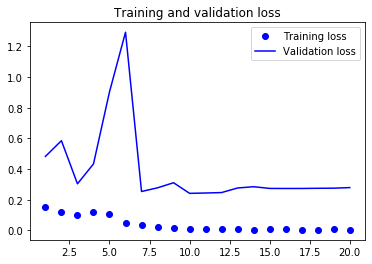

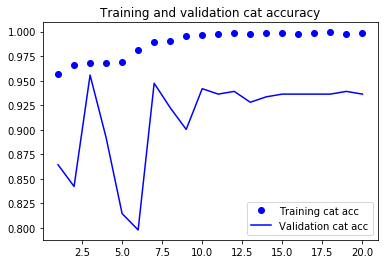

<Figure size 432x288 with 0 Axes>

In [51]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training cat acc')
plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()



plt.show()

## Confusion Matrix

In [52]:
# Get the labels of the test images.

test_labels = test_gen.classes

# We need these to plot the confusion matrix.
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
# Print the label associated with each class
test_gen.class_indices

{'a_0': 0, 'b_1': 1}

In [54]:
# make a prediction on the val data
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

361/361 [==============================] - 3s 9ms/step


In [55]:
predictions.shape

(361, 2)

In [0]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [57]:
test_labels.shape

(361,)

In [0]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [59]:
test_gen.class_indices

{'a_0': 0, 'b_1': 1}

Confusion matrix, without normalization
[[169   4]
 [ 12 176]]


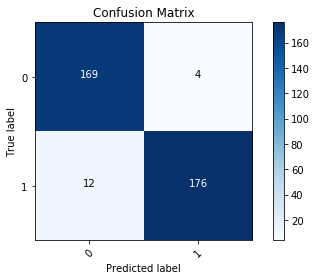

In [60]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['0', '1']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Classification Report

In [0]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_gen.classes

In [62]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       173
           1       0.98      0.94      0.96       188

    accuracy                           0.96       361
   macro avg       0.96      0.96      0.96       361
weighted avg       0.96      0.96      0.96       361



> **Recall** = Given a class, will the classifier be able to detect it?<br>
> **Precision** = Given a class prediction from a classifier, how likely is it to be correct?<br>
> **F1 Score** = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

### Results

Based on the above scores, performance looks surprisingly good. Maybe too good. I hope I haven't made a mistake somewhere in the code.

In [0]:
# Delete the image data directory we created to prevent a Kaggle error.
# Kaggle allows a max of 500 files to be saved.

shutil.rmtree('base_dir')

## Convert the Model to Tensorflow.js

In [63]:
# Install tensorflowjs.
# Don't use the latest version. Instead install version 1.1.2

# --ignore-installed is added to fix an error.

!pip install tensorflowjs==1.1.2 --ignore-installed

     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 317kB 20.2MB/s 
     |████████████████████████████████| 13.9MB 239kB/s 
     |████████████████████████████████| 2.8MB 50.2MB/s 
     |████████████████████████████████| 95.2MB 103kB/s 
     |████████████████████████████████| 1.3MB 48.7MB/s 
     |████████████████████████████████| 276kB 66.6MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 26.1MB 115kB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 112kB 70.7MB/s 
     |████████████████████████████████| 3.8MB 47.7MB/s 
     |████████████████████████████████| 2.7MB 50.9MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
     |████████████████████████████████| 450kB 44.5MB/s 
     |████████████████████████████████| 593kB 58.5MB/s 
     |████████████████████████████████| 92kB 15.1MB/s 
 

In [0]:
# Use the command line conversion tool to convert the model

!tensorflowjs_converter --input_format keras model.h5 tfjs/model

In [68]:
# check that the folder containing the tfjs model files has been created
!ls -al ./tfjs/model/

total 12688
drwxr-xr-x 2 root root    4096 Feb 16 00:45 .
drwxr-xr-x 3 root root    4096 Feb 16 00:45 ..
-rw-r--r-- 1 root root 4194304 Feb 16 00:45 group1-shard1of4.bin
-rw-r--r-- 1 root root 4194304 Feb 16 00:45 group1-shard2of4.bin
-rw-r--r-- 1 root root 4194304 Feb 16 00:45 group1-shard3of4.bin
-rw-r--r-- 1 root root  340744 Feb 16 00:45 group1-shard4of4.bin
-rw-r--r-- 1 root root   56614 Feb 16 00:45 model.json


In [0]:
!cp -r ./tfjs /content/drive/My\ Drive/DR/data/

In [72]:
!ls /content/drive/My\ Drive/DR/data/tfjs/model

group1-shard1of4.bin  group1-shard3of4.bin  model.json
group1-shard2of4.bin  group1-shard4of4.bin


## Helpful Resources

- Excellent tutorial series by deeplizard on how to use Mobilenet with Tensorflow.js<br>
It explains how to build and deploy a tfjs web app.<br>
https://www.youtube.com/watch?v=HEQDRWMK6yY

- Tensorflow.js gallery of projects<br>
https://github.com/tensorflow/tfjs/blob/master/GALLERY.md

- Some practical tfjs related lessons I've learned are listed on the readme page of this repo:<br>
https://github.com/vbookshelf/Skin-Lesion-Analyzer

- Google video discussing their work on diabetic retinopathy<br>
https://www.youtube.com/watch?v=JzB7yS9t1YE&feature=youtu.be&t=261

- Video about taking fundus images using a mobile phone camera<br>
https://www.jove.com/video/55958/smartphone-fundus-photography

## Citations

- MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications<br>
Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam<br>
https://arxiv.org/abs/1704.04861

- Image by cdd20 from Pixabay

## Conclusion

Thank you for reading.